<a href="https://colab.research.google.com/github/henriquequeirozcunha/Forecasting-Solar-Energy/blob/master/C%C3%B3pia_de_PROJETO_DOING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Universidade de Pernambuco (UPE)
#Escola Politecnica de Pernambuco (Poli)
#Curso de Especializacao em Ciencia dos Dados e Analytics
#Disciplina de Solucoes em Mineracao de dados
#--------------------------------------------------------
#Script para tratamentos de valores ausentes
#--------------------------------------------------------
# Importando Base LABREN - BOM JESUS DA LAPA CODIGO 24730


# Importando as bibliotecas necessarias
import pandas
import scipy
import numpy

from pandas import read_csv
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
seed = 42

# Importando Dados da ONS

In [3]:
rawDatasetONS = read_csv('/content/ONS_IMPORT.csv', sep=',', encoding='latin-1')
print(rawDatasetONS.columns)
dataset_BOM_JESUS_LAPA = rawDatasetONS[['data', 'dsc_estado', 'nome_usina', 'gera_mwmed']]
dataset_BOM_JESUS_LAPA_fixed = dataset_BOM_JESUS_LAPA
dataset_BOM_JESUS_LAPA_fixed.iloc[:, 3] = dataset_BOM_JESUS_LAPA_fixed.iloc[:,3].apply(lambda s: float(s.replace(',','.')))

print(dataset_BOM_JESUS_LAPA_fixed.head(10))

datasetONS = dataset_BOM_JESUS_LAPA_fixed



Index(['data', 'dsc_estado', 'nome_usina', 'gera_gwh', 'gera_mwmed'], dtype='object')
                  data dsc_estado                       nome_usina  gera_mwmed
0  01/01/2019 00:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR       0.000
1  01/01/2019 01:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR       0.000
2  01/01/2019 02:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR       0.000
3  01/01/2019 03:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR       0.000
4  01/01/2019 04:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR       0.000
5  01/01/2019 05:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR       0.000
6  01/01/2019 06:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR       1.110
7  01/01/2019 07:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR      13.998
8  01/01/2019 08:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR      26.319
9  01/01/2019 09:00:00      BAHIA  CONJUNTO FOTOVOLTAICO BJL SOLAR      33.001


# Importando dados INMET

In [10]:
#Nome: BOM JESUS DA LAPA
#Codigo Estacao: A418
#Latitude: -13.251094
#Longitude: -43.405365
#Altitude: 447.75
#Situacao: Operante
#Data Inicial: 2019-01-01
#Data Final: 2019-12-31
#Periodicidade da Medicao: Horaria
# PASSOS ALTERADOS DIRETO NO ARQUIVO
# 1 - as colunas foram definidas mudando diretamento o arquivo antes de importar no colab
# 2 - apos definir a coluna, foi trocado virgula por ponto direto no arquivo. Depois vejo a funcao de replace...
# 3 - troquei null por branco


rawDatasetINMET = read_csv('/content/INMET.CSV', sep=';', encoding='latin-1')
rawDatasetINMET = rawDatasetINMET.drop('Unnamed: 20', 1)
datasetINMET = rawDatasetINMET
datasetINMET['hora'] = datasetINMET['hora'].astype(str).str.zfill(4)

print(datasetINMET.head(5))  

print('isna:\n',datasetINMET['prep_total'].isna().sum())  


         data  hora  ...  vento_rajada_maxima  vento_velocidade_horaria_ms
0  2019/01/01  0000  ...                  1.7                          NaN
1  2019/01/01  0100  ...                  1.6                          NaN
2  2019/01/01  0200  ...                  0.3                          NaN
3  2019/01/01  0300  ...                  0.6                          NaN
4  2019/01/01  0400  ...                  0.0                          NaN

[5 rows x 20 columns]
isna:
 1664


# Importando Dados SOLCAST

In [7]:
#Nome: BOM JESUS DA LAPA
#Codigo Estacao: A418
#Latitude: -13.251094
#Longitude: -43.405365
#Altitude: 447.75
#Situacao: Operante
#Data Inicial: 2019-01-01
#Data Final: 2019-12-31
#Periodicidade da Medicao: Horaria
# PASSOS ALTERADOS DIRETO NO ARQUIVO
# 1 - as colunas foram definidas mudando diretamento o arquivo antes de importar no colab
# 2 - apos definir a coluna, foi trocado virgula por ponto direto no arquivo. Depois vejo a funcao de replace...
# 3 - troquei null por branco


rawDatasetSOLCAST = read_csv('/content/SOLCAST.csv', sep=',', encoding='latin-1')
datasetSOLCAST = rawDatasetSOLCAST
print(datasetSOLCAST.columns)
print(datasetSOLCAST.shape) 

datasetSOLCAST['data_parsed'] = pandas.to_datetime(dict(year=datasetSOLCAST.ano, month=datasetSOLCAST.mes, day=datasetSOLCAST.dia, hour=datasetSOLCAST.hora, minute=datasetSOLCAST.minuto)).dt.strftime('%d/%m/%Y %H:%M:%S')

datasetSOLCAST.drop('ano',axis=1,inplace=True) 
datasetSOLCAST.drop('mes',axis=1,inplace=True) 
datasetSOLCAST.drop('dia',axis=1,inplace=True) 
datasetSOLCAST.drop('hora',axis=1,inplace=True) 
datasetSOLCAST.drop('minuto',axis=1,inplace=True) 
datasetSOLCAST.drop('SnowDepth(cm)',axis=1,inplace=True) 

datasetSOLCAST


Index(['ano', 'mes', 'dia', 'hora', 'minuto', 'Tamb(C)', 'Albedo',
       'Azimuth(degree)', 'Cloudopacity(%)', 'DewPoint(C)', 'DHI(W/m2)',
       'DNI(W/m2)', 'EBH(W/m2)', 'GHI(W/m2)', 'GtiFixedTilt(W/m2)',
       'GtiTracking(W/m2)', 'Pw(cm)', 'Pressure(mbar)', 'SnowDepth(cm)',
       'WindDir(degree)', 'WindVel(m/s)', 'Zenith(degree)'],
      dtype='object')
(8763, 22)


,Tamb(C),Albedo,Azimuth(degree),Cloudopacity(%),DewPoint(C),DHI(W/m2),DNI(W/m2),EBH(W/m2),GHI(W/m2),GtiFixedTilt(W/m2),GtiTracking(W/m2),Pw(cm),Pressure(mbar),WindDir(degree),WindVel(m/s),Zenith(degree),data_parsed
0,23.7,0.13,170,0.0,18.3,0,0,0,0,0,0,3.24,948.8,168,1.2,143,31/12/2018 23:00:00
1,23.1,0.12,-167,0.0,18.3,0,0,0,0,0,0,3.19,948.7,159,1.1,142,01/01/2019 00:00:00
2,22.6,0.12,-148,0.0,18.3,0,0,0,0,0,0,3.12,948.5,147,1.2,137,01/01/2019 01:00:00
3,22.1,0.12,-134,0.0,18.2,0,0,0,0,0,0,3.05,948.3,137,1.3,128,01/01/2019 02:00:00
4,21.8,0.12,-125,0.0,18.1,0,0,0,0,0,0,3.00,948.6,129,1.4,116,01/01/2019 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,22.6,0.13,135,0.0,19.9,0,0,0,0,0,0,4.03,959.7,318,1.8,129,31/12/2019 21:00:00
8759,22.0,0.13,150,0.0,20.0,0,0,0,0,0,0,3.92,959.8,353,1.2,138,31/12/2019 22:00:00
8760,21.5,0.13,170,0.5,19.9,0,0,0,0,0,0,3.80,959.7,31,1.9,143,31/12/2019 23:00:00
8761,21.1,0.14,-167,28.1,19.8,0,0,0,0,0,0,3.81,959.4,29,2.3,142,01/01/2020 00:00:00


# Iniciando trabalho com a base de dados

In [8]:
print("Apresentando o shape dos dados (dimenssoes) - INMET")
print(datasetINMET.shape)

print("Apresentando os atributos - INMET")
for col in datasetINMET.columns:
    print(col)

print("Apresentando o shape dos dados (dimenssoes) - ONS")
print(datasetONS.shape)

print("Apresentando os atributos - ONS")
for col in datasetONS.columns:
    print(col)

print("Apresentando o shape dos dados (dimenssoes) - SOLCAST")
print(datasetSOLCAST.shape)

print("Apresentando os atributos - SOLCAST")
for col in datasetSOLCAST.columns:
    print(col)    

print("Apresentando quantidade dados nulos na base - INMET")
print('isna:\n',datasetINMET.isna().sum())  

print("Apresentando quantidade dados nulos na base - ONS")
print('isna:\n',datasetONS.isna().sum()) 


print("Apresentando quantidade dados nulos na base - SOLCAST")
print('isna:\n',datasetSOLCAST.isna().sum())  

print("Visualizando o conjunto inicial (head) dos dados INMET")
print(datasetINMET.head(2))

print("Visualizando o conjunto inicial (head) dos dados ONS")
print(datasetONS.head(2))

print("Visualizando o conjunto inicial (head) dos dados ONS")
print(datasetSOLCAST.head(2))


Apresentando o shape dos dados (dimenssoes) - INMET
(8760, 20)
Apresentando os atributos - INMET
data
hora
prep_total
horario_mm
pressao_atmosferica_horaria_mb
pressao_atmosferica_max_mb
pressao_atmosferica_min_mb
radiacao_global_kj_m2
temperatura_ar_bulbo_seco
temperatura_ponto_orvalho
temperatura_max_hora_anterior
temperatura_min_hora_anterior
temperatura_max_orvalho_hora_anterior
temperatura_min_orvalho_hora_anterior
umidade_relativa_max_hora_anterior
umidade_relativa_min_hora_anterior
umidade_relativa_horaria
vento_direcao_horaria
vento_rajada_maxima
vento_velocidade_horaria_ms
Apresentando o shape dos dados (dimenssoes) - ONS
(8737, 4)
Apresentando os atributos - ONS
data
dsc_estado
nome_usina
gera_mwmed
Apresentando o shape dos dados (dimenssoes) - SOLCAST
(8763, 17)
Apresentando os atributos - SOLCAST
Tamb(C)
Albedo
Azimuth(degree)
Cloudopacity(%)
DewPoint(C)
DHI(W/m2)
DNI(W/m2)
EBH(W/m2)
GHI(W/m2)
GtiFixedTilt(W/m2)
GtiTracking(W/m2)
Pw(cm)
Pressure(mbar)
WindDir(degree)
WindVe

Pré processamento

In [11]:

#preenchendo com as ocorrencias mais próximas
#datasetINMET.fillna(method='ffill',inplace=True)
datasetINMET.fillna(0,inplace=True)

# Preenchendo os valores ausentes com base na media dos valores da coluna
# existe ainda as opcoes via mediana e valores mais frequentes
#dataset.fillna(dataset.mean(), inplace=True)

#fazendo interpolacao para encontrar os novos valores para NaN
#datasetINMET=datasetINMET.interpolate()

print("Apresentando quantidade dados nulos apos tratamento na base - INMET")
print('isna:\n',datasetINMET.isna().sum())

print("Visualizando o conjunto inicial (head) dos dados INMET")
print(datasetINMET.head(200))

Apresentando quantidade dados nulos apos tratamento na base - INMET
isna:
 data                                     0
hora                                     0
prep_total                               0
horario_mm                               0
pressao_atmosferica_horaria_mb           0
pressao_atmosferica_max_mb               0
pressao_atmosferica_min_mb               0
radiacao_global_kj_m2                    0
temperatura_ar_bulbo_seco                0
temperatura_ponto_orvalho                0
temperatura_max_hora_anterior            0
temperatura_min_hora_anterior            0
temperatura_max_orvalho_hora_anterior    0
temperatura_min_orvalho_hora_anterior    0
umidade_relativa_max_hora_anterior       0
umidade_relativa_min_hora_anterior       0
umidade_relativa_horaria                 0
vento_direcao_horaria                    0
vento_rajada_maxima                      0
vento_velocidade_horaria_ms              0
dtype: int64
Visualizando o conjunto inicial (head) dos dados INM

## Preparando o campo de data na Base INMET para fazer merge com ONS

In [12]:
datasetINMET

datasetINMET['data_parsed'] = pandas.to_datetime(datasetINMET['data'] + " " + datasetINMET['hora'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y %H:%M:%S')

datasetINMET


,data,hora,prep_total,horario_mm,pressao_atmosferica_horaria_mb,pressao_atmosferica_max_mb,pressao_atmosferica_min_mb,radiacao_global_kj_m2,temperatura_ar_bulbo_seco,temperatura_ponto_orvalho,temperatura_max_hora_anterior,temperatura_min_hora_anterior,temperatura_max_orvalho_hora_anterior,temperatura_min_orvalho_hora_anterior,umidade_relativa_max_hora_anterior,umidade_relativa_min_hora_anterior,umidade_relativa_horaria,vento_direcao_horaria,vento_rajada_maxima,vento_velocidade_horaria_ms,data_parsed
0,2019/01/01,0000,0.0,962.1,962.1,961.4,0.0,23.6,22.3,24.4,23.6,22.3,22.1,93.0,87.0,93.0,205.0,3.5,1.7,0.0,01/01/2019 00:00:00
1,2019/01/01,0100,0.0,962.2,962.4,962.1,0.0,23.9,21.7,24.0,23.5,22.3,21.7,93.0,87.0,87.0,191.0,4.1,1.6,0.0,01/01/2019 01:00:00
2,2019/01/01,0200,0.0,962.2,962.2,962.0,0.0,23.3,21.5,23.9,23.2,21.7,21.4,90.0,87.0,89.0,197.0,3.6,0.3,0.0,01/01/2019 02:00:00
3,2019/01/01,0300,0.0,962.3,962.3,962.2,0.0,23.6,21.6,23.6,23.3,21.6,21.4,90.0,88.0,88.0,276.0,3.0,0.6,0.0,01/01/2019 03:00:00
4,2019/01/01,0400,0.0,961.9,962.4,961.8,0.0,23.4,21.2,23.6,23.1,21.5,21.2,90.0,88.0,88.0,261.0,4.1,0.0,0.0,01/01/2019 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019/12/31,1900,0.0,958.1,958.9,958.1,2019.7,28.9,21.1,29.6,28.7,22.0,20.4,66.0,60.0,63.0,5.0,7.3,4.0,0.0,31/12/2019 19:00:00
8756,2019/12/31,2000,0.0,957.7,958.1,957.7,976.1,28.5,20.7,28.9,28.3,21.3,20.6,65.0,62.0,62.0,3.0,7.3,3.1,0.0,31/12/2019 20:00:00
8757,2019/12/31,2100,0.0,958.3,958.3,957.6,476.5,27.7,21.7,28.7,27.7,21.7,20.4,70.0,62.0,70.0,15.0,7.1,3.2,0.0,31/12/2019 21:00:00
8758,2019/12/31,2200,0.0,959.0,959.0,958.3,18.5,26.5,21.9,27.7,26.5,22.0,21.5,76.0,69.0,76.0,44.0,5.9,0.3,0.0,31/12/2019 22:00:00


In [13]:
datasetONS

,data,dsc_estado,nome_usina,gera_mwmed
0,01/01/2019 00:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0
1,01/01/2019 01:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0
2,01/01/2019 02:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0
3,01/01/2019 03:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0
4,01/01/2019 04:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0
...,...,...,...,...
8732,06/06/2019 19:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0
8733,06/06/2019 20:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0
8734,06/06/2019 21:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0
8735,06/06/2019 22:00:00,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0


Concatenando as bases

In [14]:
merged_ons_inmet = pandas.merge(left=datasetONS, right=datasetINMET, left_on='data', right_on='data_parsed')
merged_ons_inmet

merged_ons_inmet['arima_hora'] = pandas.to_datetime(datasetINMET['data_parsed'], format='%d/%m/%Y %H:%M:%S').dt.strftime('%H%M')
merged_ons_inmet['arima_data'] = pandas.to_datetime(datasetINMET['data'])

merged_ons_inmet.drop('data_y',axis=1,inplace=True) 
merged_ons_inmet.drop('data_x',axis=1,inplace=True) 
merged_ons_inmet.rename(columns={'arima_data': 'data'})


merged_ons_inmet

,dsc_estado,nome_usina,gera_mwmed,hora,prep_total,horario_mm,pressao_atmosferica_horaria_mb,pressao_atmosferica_max_mb,pressao_atmosferica_min_mb,radiacao_global_kj_m2,temperatura_ar_bulbo_seco,temperatura_ponto_orvalho,temperatura_max_hora_anterior,temperatura_min_hora_anterior,temperatura_max_orvalho_hora_anterior,temperatura_min_orvalho_hora_anterior,umidade_relativa_max_hora_anterior,umidade_relativa_min_hora_anterior,umidade_relativa_horaria,vento_direcao_horaria,vento_rajada_maxima,vento_velocidade_horaria_ms,data_parsed,arima_hora,arima_data
0,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0000,0.0,962.1,962.1,961.4,0.0,23.6,22.3,24.4,23.6,22.3,22.1,93.0,87.0,93.0,205.0,3.5,1.7,0.0,01/01/2019 00:00:00,0000,2019-01-01
1,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0100,0.0,962.2,962.4,962.1,0.0,23.9,21.7,24.0,23.5,22.3,21.7,93.0,87.0,87.0,191.0,4.1,1.6,0.0,01/01/2019 01:00:00,0100,2019-01-01
2,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0200,0.0,962.2,962.2,962.0,0.0,23.3,21.5,23.9,23.2,21.7,21.4,90.0,87.0,89.0,197.0,3.6,0.3,0.0,01/01/2019 02:00:00,0200,2019-01-01
3,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0300,0.0,962.3,962.3,962.2,0.0,23.6,21.6,23.6,23.3,21.6,21.4,90.0,88.0,88.0,276.0,3.0,0.6,0.0,01/01/2019 03:00:00,0300,2019-01-01
4,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0400,0.0,961.9,962.4,961.8,0.0,23.4,21.2,23.6,23.1,21.5,21.2,90.0,88.0,88.0,261.0,4.1,0.0,0.0,01/01/2019 04:00:00,0400,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,1900,0.0,964.2,964.3,964.1,350.6,29.0,15.8,29.3,28.9,16.1,15.7,45.0,44.0,45.0,119.0,6.0,2.1,0.0,06/06/2019 19:00:00,2000,2019-12-30
8733,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2000,0.0,964.1,964.2,964.1,150.5,28.6,15.6,29.1,28.6,15.9,15.6,45.0,45.0,45.0,119.0,6.1,2.7,0.0,06/06/2019 20:00:00,2100,2019-12-30
8734,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2100,0.0,964.4,964.4,964.1,13.8,28.0,15.5,28.6,28.0,15.6,15.5,47.0,45.0,47.0,108.0,6.0,0.7,0.0,06/06/2019 21:00:00,2200,2019-12-30
8735,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2200,0.0,964.6,964.6,964.4,0.0,27.5,15.6,28.0,27.5,15.6,15.5,48.0,47.0,48.0,109.0,3.3,0.3,0.0,06/06/2019 22:00:00,2300,2019-12-30


In [15]:
merged_ons_inmet_solcast = pandas.merge(left=merged_ons_inmet, right=datasetSOLCAST, left_on='data_parsed', right_on='data_parsed')

merged_ons_inmet_solcast

,dsc_estado,nome_usina,gera_mwmed,hora,prep_total,horario_mm,pressao_atmosferica_horaria_mb,pressao_atmosferica_max_mb,pressao_atmosferica_min_mb,radiacao_global_kj_m2,temperatura_ar_bulbo_seco,temperatura_ponto_orvalho,temperatura_max_hora_anterior,temperatura_min_hora_anterior,temperatura_max_orvalho_hora_anterior,temperatura_min_orvalho_hora_anterior,umidade_relativa_max_hora_anterior,umidade_relativa_min_hora_anterior,umidade_relativa_horaria,vento_direcao_horaria,vento_rajada_maxima,vento_velocidade_horaria_ms,data_parsed,arima_hora,arima_data,Tamb(C),Albedo,Azimuth(degree),Cloudopacity(%),DewPoint(C),DHI(W/m2),DNI(W/m2),EBH(W/m2),GHI(W/m2),GtiFixedTilt(W/m2),GtiTracking(W/m2),Pw(cm),Pressure(mbar),WindDir(degree),WindVel(m/s),Zenith(degree)
0,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0000,0.0,962.1,962.1,961.4,0.0,23.6,22.3,24.4,23.6,22.3,22.1,93.0,87.0,93.0,205.0,3.5,1.7,0.0,01/01/2019 00:00:00,0000,2019-01-01,23.1,0.12,-167,0.0,18.3,0,0,0,0,0,0,3.19,948.7,159,1.1,142
1,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0100,0.0,962.2,962.4,962.1,0.0,23.9,21.7,24.0,23.5,22.3,21.7,93.0,87.0,87.0,191.0,4.1,1.6,0.0,01/01/2019 01:00:00,0100,2019-01-01,22.6,0.12,-148,0.0,18.3,0,0,0,0,0,0,3.12,948.5,147,1.2,137
2,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0200,0.0,962.2,962.2,962.0,0.0,23.3,21.5,23.9,23.2,21.7,21.4,90.0,87.0,89.0,197.0,3.6,0.3,0.0,01/01/2019 02:00:00,0200,2019-01-01,22.1,0.12,-134,0.0,18.2,0,0,0,0,0,0,3.05,948.3,137,1.3,128
3,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0300,0.0,962.3,962.3,962.2,0.0,23.6,21.6,23.6,23.3,21.6,21.4,90.0,88.0,88.0,276.0,3.0,0.6,0.0,01/01/2019 03:00:00,0300,2019-01-01,21.8,0.12,-125,0.0,18.1,0,0,0,0,0,0,3.00,948.6,129,1.4,116
4,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0400,0.0,961.9,962.4,961.8,0.0,23.4,21.2,23.6,23.1,21.5,21.2,90.0,88.0,88.0,261.0,4.1,0.0,0.0,01/01/2019 04:00:00,0400,2019-01-01,21.5,0.12,-118,0.0,17.9,0,0,0,0,0,0,2.96,949.2,122,1.6,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,1900,0.0,964.2,964.3,964.1,350.6,29.0,15.8,29.3,28.9,16.1,15.7,45.0,44.0,45.0,119.0,6.0,2.1,0.0,06/06/2019 19:00:00,2000,2019-12-30,26.2,0.12,71,0.0,13.9,0,0,0,0,0,0,3.18,964.7,117,2.6,118
8733,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2000,0.0,964.1,964.2,964.1,150.5,28.6,15.6,29.1,28.6,15.9,15.6,45.0,45.0,45.0,119.0,6.1,2.7,0.0,06/06/2019 20:00:00,2100,2019-12-30,25.5,0.12,71,0.0,14.0,0,0,0,0,0,0,3.22,965.2,111,3.1,131
8734,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2100,0.0,964.4,964.4,964.1,13.8,28.0,15.5,28.6,28.0,15.6,15.5,47.0,45.0,47.0,108.0,6.0,0.7,0.0,06/06/2019 21:00:00,2200,2019-12-30,24.9,0.12,69,0.0,14.0,0,0,0,0,0,0,3.24,965.5,111,3.6,145
8735,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2200,0.0,964.6,964.6,964.4,0.0,27.5,15.6,28.0,27.5,15.6,15.5,48.0,47.0,48.0,109.0,3.3,0.3,0.0,06/06/2019 22:00:00,2300,2019-12-30,24.2,0.12,60,0.0,13.9,0,0,0,0,0,0,3.22,965.8,115,3.9,158


In [19]:
print(datasetONS.shape)
print(datasetINMET.shape)
print(datasetSOLCAST.shape)
print(merged_ons_inmet_solcast.shape)

print("Apresentando quantidade dados nulos antes tratamento na base - merged_ons_inmet")
print('isna:\n',merged_ons_inmet_solcast.isna().sum())

#preenchendo com as ocorrencias mais próximas
#merged_ons_inmet.fillna(method='ffill',inplace=True)

#fazendo interpolacao para encontrar os novos valores para NaN
#merged_ons_inmet_solcast=merged_ons_inmet_solcast.interpolate()

(8737, 4)
(8760, 21)
(8763, 17)
(8737, 41)
Apresentando quantidade dados nulos antes tratamento na base - merged_ons_inmet
isna:
 dsc_estado                               0
nome_usina                               0
gera_mwmed                               0
hora                                     0
prep_total                               0
horario_mm                               0
pressao_atmosferica_horaria_mb           0
pressao_atmosferica_max_mb               0
pressao_atmosferica_min_mb               0
radiacao_global_kj_m2                    0
temperatura_ar_bulbo_seco                0
temperatura_ponto_orvalho                0
temperatura_max_hora_anterior            0
temperatura_min_hora_anterior            0
temperatura_max_orvalho_hora_anterior    0
temperatura_min_orvalho_hora_anterior    0
umidade_relativa_max_hora_anterior       0
umidade_relativa_min_hora_anterior       0
umidade_relativa_horaria                 0
vento_direcao_horaria                    0
vento_raja

# Definido a base geral para análise

In [20]:
base = merged_ons_inmet_solcast
base

,dsc_estado,nome_usina,gera_mwmed,hora,prep_total,horario_mm,pressao_atmosferica_horaria_mb,pressao_atmosferica_max_mb,pressao_atmosferica_min_mb,radiacao_global_kj_m2,temperatura_ar_bulbo_seco,temperatura_ponto_orvalho,temperatura_max_hora_anterior,temperatura_min_hora_anterior,temperatura_max_orvalho_hora_anterior,temperatura_min_orvalho_hora_anterior,umidade_relativa_max_hora_anterior,umidade_relativa_min_hora_anterior,umidade_relativa_horaria,vento_direcao_horaria,vento_rajada_maxima,vento_velocidade_horaria_ms,data_parsed,arima_hora,arima_data,Tamb(C),Albedo,Azimuth(degree),Cloudopacity(%),DewPoint(C),DHI(W/m2),DNI(W/m2),EBH(W/m2),GHI(W/m2),GtiFixedTilt(W/m2),GtiTracking(W/m2),Pw(cm),Pressure(mbar),WindDir(degree),WindVel(m/s),Zenith(degree)
0,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0000,0.0,962.1,962.1,961.4,0.0,23.6,22.3,24.4,23.6,22.3,22.1,93.0,87.0,93.0,205.0,3.5,1.7,0.0,01/01/2019 00:00:00,0000,2019-01-01,23.1,0.12,-167,0.0,18.3,0,0,0,0,0,0,3.19,948.7,159,1.1,142
1,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0100,0.0,962.2,962.4,962.1,0.0,23.9,21.7,24.0,23.5,22.3,21.7,93.0,87.0,87.0,191.0,4.1,1.6,0.0,01/01/2019 01:00:00,0100,2019-01-01,22.6,0.12,-148,0.0,18.3,0,0,0,0,0,0,3.12,948.5,147,1.2,137
2,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0200,0.0,962.2,962.2,962.0,0.0,23.3,21.5,23.9,23.2,21.7,21.4,90.0,87.0,89.0,197.0,3.6,0.3,0.0,01/01/2019 02:00:00,0200,2019-01-01,22.1,0.12,-134,0.0,18.2,0,0,0,0,0,0,3.05,948.3,137,1.3,128
3,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0300,0.0,962.3,962.3,962.2,0.0,23.6,21.6,23.6,23.3,21.6,21.4,90.0,88.0,88.0,276.0,3.0,0.6,0.0,01/01/2019 03:00:00,0300,2019-01-01,21.8,0.12,-125,0.0,18.1,0,0,0,0,0,0,3.00,948.6,129,1.4,116
4,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,0400,0.0,961.9,962.4,961.8,0.0,23.4,21.2,23.6,23.1,21.5,21.2,90.0,88.0,88.0,261.0,4.1,0.0,0.0,01/01/2019 04:00:00,0400,2019-01-01,21.5,0.12,-118,0.0,17.9,0,0,0,0,0,0,2.96,949.2,122,1.6,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,1900,0.0,964.2,964.3,964.1,350.6,29.0,15.8,29.3,28.9,16.1,15.7,45.0,44.0,45.0,119.0,6.0,2.1,0.0,06/06/2019 19:00:00,2000,2019-12-30,26.2,0.12,71,0.0,13.9,0,0,0,0,0,0,3.18,964.7,117,2.6,118
8733,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2000,0.0,964.1,964.2,964.1,150.5,28.6,15.6,29.1,28.6,15.9,15.6,45.0,45.0,45.0,119.0,6.1,2.7,0.0,06/06/2019 20:00:00,2100,2019-12-30,25.5,0.12,71,0.0,14.0,0,0,0,0,0,0,3.22,965.2,111,3.1,131
8734,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2100,0.0,964.4,964.4,964.1,13.8,28.0,15.5,28.6,28.0,15.6,15.5,47.0,45.0,47.0,108.0,6.0,0.7,0.0,06/06/2019 21:00:00,2200,2019-12-30,24.9,0.12,69,0.0,14.0,0,0,0,0,0,0,3.24,965.5,111,3.6,145
8735,BAHIA,CONJUNTO FOTOVOLTAICO BJL SOLAR,0.0,2200,0.0,964.6,964.6,964.4,0.0,27.5,15.6,28.0,27.5,15.6,15.5,48.0,47.0,48.0,109.0,3.3,0.3,0.0,06/06/2019 22:00:00,2300,2019-12-30,24.2,0.12,60,0.0,13.9,0,0,0,0,0,0,3.22,965.8,115,3.9,158


# ARIMA

In [21]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 16.4MB/s 
     |████████████████████████████████| 9.5MB 25.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [111]:
import pmdarima as pm
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

le = LabelEncoder()
minmax_sc = MinMaxScaler()

numberData = 200

for c in base.columns:
    if (c in ['dsc_estado', 'nome_usina']):
        le.fit(base[c])
        base['label_' + c] = le.transform(base[c])


base['arima_data'] = pandas.to_datetime(base['arima_data'])
base['arima_data_ordinal']=base['arima_data'].map(dt.datetime.toordinal)
#base['hora'] = base['hora'].astype(int)
base['arima_hora'] = base['arima_hora'].astype(int)

data = base.loc[:, ~base.columns.isin(['arima_hora', 'arima_data','dsc_estado', 'nome_usina', 'data_parsed', 'prep_total', 'vento_velocidade_horaria_ms', 'pressao_atmosferica_min_mb'])]

base_x_autoarima = base.iloc[:numberData]
y_autoarima = data['gera_mwmed'].iloc[:numberData].values
y_autoarima = np.reshape(y_autoarima, (-1,1))
x_autoarima = data.loc[:, ~data.columns.isin(['gera_mwmed'])].iloc[:numberData]

# input scaling
x_autoarima = minmax_sc.fit_transform(x_autoarima)

# outcome scaling:
y_autoarima = minmax_sc.fit_transform(y)

x_autoarima


modelo_auto = pm.auto_arima(y=y_autoarima, X=x_autoarima, seasonal=True, m=24, maxiter=50, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-296.955, Time=17.18 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-301.830, Time=1.43 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-303.294, Time=14.23 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-304.984, Time=12.82 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-301.675, Time=1.30 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=-306.744, Time=2.73 sec
 ARIMA(0,0,1)(1,0,0)[24] intercept   : AIC=-305.278, Time=11.40 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=-303.148, Time=13.77 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=-304.683, Time=2.81 sec
 ARIMA(0,0,2)(0,0,0)[24] intercept   : AIC=-304.674, Time=2.78 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=-304.990, Time=1.50 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=-302.816, Time=2.99 sec
 ARIMA(0,0,1)(0,0,0)[24]             : AIC=-305.795, Time=2.57 sec

Best model:  ARIMA(0,0,1)(0,0,0)[24] intercept
Total fit time: 87.526 seconds


In [112]:
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 191.372
Date:                Fri, 07 May 2021   AIC                           -306.744
Time:                        01:52:12   BIC                           -181.408
Sample:                             0   HQIC                          -256.022
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4075      0.357     -1.141      0.254      -1.107       0.292
x1            -0.0453      0.110     -0.412      0.680      -0.261       0.170
x2            -0.3891      0.302     -1.289      0.197      -0.981       0.202
x3             0.8167      0.250      3.261      0.001       0.326       1.308
x4            -0.3278      0.242     -1.352      0.176      -0.803       0.147
x5             0.4675      0.776      0.603      0.547      -1.052       1.987
x6            -0.1433      0.344     -0.417      0.677      -0.817       0.530
x7             0.5444      0.491      1.109      0.267      -0.417       1.506
x8            -0.8427      0.619     -1.362      0.173      -2.055       0.370
x9            -0.0622      0.251     -0.247      0.805      -0.555       0.430
x10            0.0318      0.240      0.132      0.895      -0.440       0.503
x11           -0.2554      0.591     -0.432      0.666      -1.414       0.903
x12            0.2953      0.530      0.557      0.577      -0.743       1.334
x13            0.4747      0.774      0.614      0.540      -1.042       1.991
x14            0.0314      0.045      0.691      0.490      -0.058       0.120
x15           -0.1631      0.134     -1.216      0.224      -0.426       0.100
x16            0.0501      0.079      0.636      0.525      -0.104       0.204
x17            0.4348      0.185      2.353      0.019       0.073       0.797
x18            0.0911      0.075      1.211      0.226      -0.056       0.239
x19            0.0289      0.075      0.389      0.698      -0.117       0.175
x20            0.0991      0.093      1.062      0.288      -0.084       0.282
x21            0.1136      0.139      0.819      0.413      -0.158       0.385
x22           -2.5046     10.758     -0.233      0.816     -23.590      18.580
x23            1.5012      1.186      1.266      0.206      -0.823       3.826
x24           -5.4888     19.757     -0.278      0.781     -44.212      33.235
x25           -5.5937     22.636     -0.247      0.805     -49.959      38.771
x26           10.9868     10.990      1.000      0.317     -10.554      32.528
x27           -0.1861      0.263     -0.708      0.479      -0.701       0.329
x28            0.0119      0.084      0.142      0.887      -0.152       0.176
x29           -0.1882      0.160     -1.177      0.239      -0.502       0.125
x30           -0.1323      0.165     -0.802      0.423      -0.456       0.191
x31            0.2070      0.105      1.966      0.049       0.001       0.413
x32            0.0490      0.173      0.284      0.777      -0.290       0.388
const               0        nan        nan        nan         nan         nan
x33                 0    9.6e-15          0      1.000   -1.88e-14    1.88e-14
x34           -0.0734      0.070     -1.047      0.295      -0.211       0.064
ma.L1          0.2858      0.075      3.802      0.000       0.138       0.433
sigma2         0.0086      0.001      8.887      0.000       0.007       0.011
==

In [113]:
results = modelo_auto.fit(y = y_autoarima, X = x_autoarima, disp=True)

In [119]:
finalIndexData = numberData*2
x_auto_arima = data.loc[:, ~data.columns.isin(['gera_mwmed'])].iloc[numberData:finalIndexData]
previsoes = results.predict(n_periods=numberData, X=x_autoarima)
previsoes
previsoes_copy = previsoes.copy()

previsoes[previsoes < 0 ] = 0
previsoes = np.reshape(previsoes, (-1,1))
previsoes


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.06984165],
       [0.26816541],
       [0.55295651],
       [0.82639032],
       [0.95645308],
       [0.94353862],
       [0.90191733],
       [0.9059283 ],
       [0.86145711],
       [0.74734193],
       [0.6354395 ],
       [0.45559031],
       [0.23265345],
       [0.03887113],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.0209288 ],
       [0.06317722],
       [0.04657608],
       [0.05892634],
       [0.06989926],
       [0.00985704],
       [0.        ],
       [0.17414952],
       [0.46280835],
       [0.65617021],
       [0.86589152],
       [0.97644762],
       [0.95668166],
       [0.89434976],
       [0.71351093],
       [0.74191343],
       [0.63058992],
       [0.47809645],
       [0.3463038 ],
       [0.27309826],
       [0.12480589],
       [0.        ],
       [0.        ],
       [0.01206782],
       [0.004

In [120]:
len(y_autoarima)

200

In [121]:
def MAPE(y_pred, y_true): 
    mask = y_true != 0
    return (np.fabs(y_true - y_pred)/y_true)[mask].mean()

print(previsoes.shape, y_autoarima.shape)    

mape_autoarima = MAPE(previsoes, y_autoarima)
print("AICc: {0}, Mape: {1}".format(results.aicc(), mape_autoarima))

results

(200, 1) (200, 1)
AICc: -288.33399886152637, Mape: 3.25025455045182


ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 24),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [122]:
modelo_auto

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 24),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

endog_y = y_autoarima
exog_x = x_autoarima

mod = SARIMAX(endog=y_autoarima, exog=x_autoarima, order=(0,0,1), out_of_sample_size=0, seasonal_order=(0, 0, 0, 24), method='lbfgs', scoring='mse',
              start_params=None, suppress_warnings=True, trend=None)

results = mod.fit(disp=True)
y_sarimax_auto = results.predict()
y_sarimax_auto = np.reshape(y_sarimax_auto, (-1,1))
y_sarimax_auto[y_sarimax_auto < 0 ] = 0
mape_autoarima = MAPE(y_sarimax_auto, endog_y)
print("AICc: {0}, Mape: {1}".format(results.aicc, mape_autoarima))

AICc: -288.4367812934915, Mape: 3.2103252503937183


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [125]:
import matplotlib.pyplot as plt
import pickle

#y_real = data['gera_mwmed'] # quando usar a base toda
y_real = y_autoarima # quando usar apenas a base limitada para testes

y_base_autoarima = y_real
y_sarimax_previsoes = y_sarimax_auto
datas = base_x_autoarima['data_parsed']


print(len(y_base_autoarima))
print(len(y_sarimax_previsoes))
print(len(datas))

obj_resultado_previsoes = {'y_base_autoarima':y_base_autoarima, 'y_sarimax_previsoes':y_sarimax_previsoes, 'datas':datas}
pickle.dump(obj_resultado_previsoes, open('dump_resultado_previsoes.pckl', 'wb'))

200
200
200


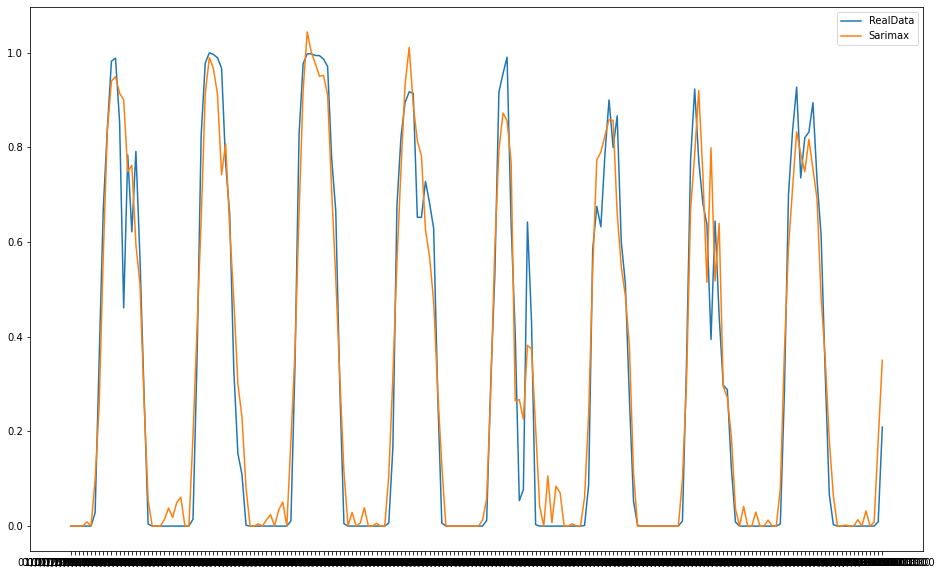

In [126]:
dump_resultado_previsoes = pickle.load(open('dump_resultado_previsoes.pckl', 'rb'))

plt.figure(figsize=(16,10))
plt.plot(dump_resultado_previsoes['datas'], dump_resultado_previsoes['y_base_autoarima'], label="RealData")
plt.plot(dump_resultado_previsoes['datas'], dump_resultado_previsoes['y_sarimax_previsoes'],label="Sarimax")
plt.legend()

# Teste Script DEEP LEARNING TIME SERIES

## Import initial database

In [174]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# usando o metodo para fazer uma unica divisao dos dados
Y = data['gera_mwmed']
X = data.loc[:, ~data.columns.isin(['gera_mwmed'])]
y = np.reshape(Y.values, (-1,1))

## Splitting Training and Test sets (TESTE DEPP LEARNING)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (6552, 35) (6552, 1) 
Test Shape: (2185, 35) (2185, 1)


## MINMAX Feature Scaling

In [176]:
# input scaling
minmax_sc = MinMaxScaler()
X_train = minmax_sc.fit_transform(X_train)
X_test = minmax_sc.transform(X_test)

# outcome scaling:
y_train = minmax_sc.fit_transform(y_train)    
y_test = minmax_sc.transform(y_test)

In [177]:
X_train

array([[0.13043478, 0.99321895, 0.99311691, ..., 0.        , 0.        ,
        0.50964187],
       [1.        , 0.98428028, 0.98417917, ..., 0.        , 0.        ,
        0.88705234],
       [0.82608696, 0.98582143, 0.98572016, ..., 0.        , 0.        ,
        0.69421488],
       ...,
       [0.69565217, 0.98828727, 0.98972673, ..., 0.        , 0.        ,
        0.61707989],
       [0.95652174, 0.98469126, 0.9845901 , ..., 0.        , 0.        ,
        0.09641873],
       [0.86956522, 0.        , 0.        , ..., 0.        , 0.        ,
        0.83195592]])

In [65]:
X_test

array([[0.69565217, 0.99003391, 0.99126772, ..., 0.        , 0.        ,
        0.12947658],
       [0.13043478, 0.98530772, 0.98520649, ..., 0.        , 0.        ,
        0.16253444],
       [0.34782609, 0.9931162 , 0.99301418, ..., 0.        , 0.        ,
        0.59779614],
       ...,
       [0.65217391, 0.99321895, 0.99414424, ..., 0.        , 0.        ,
        0.5261708 ],
       [0.        , 0.98715709, 0.98705568, ..., 0.        , 0.        ,
        0.1322314 ],
       [0.47826087, 0.98982842, 0.98972673, ..., 0.        , 0.        ,
        0.28374656]])

In [66]:
y_train

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.50130791],
       [0.        ],
       [0.        ]])

# Deep Learning

### Defining accuracy function

In [221]:
def create_mlp(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))
  
  model.add(Dense(1))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [222]:
mlp = create_mlp([32, 64], 'relu', 'normal')
mlp.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                1152      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [71]:
!pip install pydot

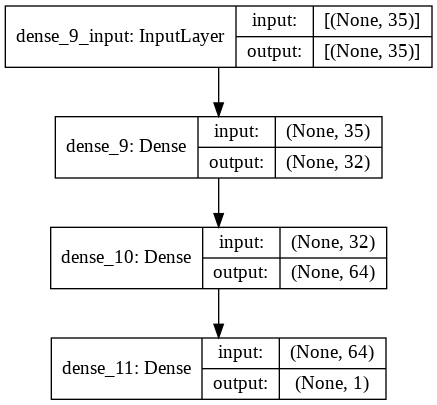

In [199]:
from keras.utils.vis_utils import plot_model
plot_model(mlp, to_file='mlp_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
hist = mlp.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test),epochs=150, verbose=0)

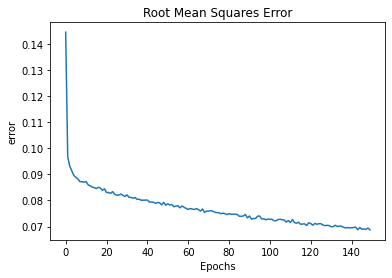

In [187]:
plt.plot(hist.history['root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

In [188]:
mlp.evaluate(X_train, y_train)

205/205 [==============================] - 0s 891us/step - loss: 0.0046 - root_mean_squared_error: 0.0681


[0.004635254852473736, 0.06808270514011383]

In [220]:
# model evaluation
from sklearn import metrics
from math import sqrt
print("Model Evaluation scores:")
# calculate RMSE
testrmse = sqrt(mean_squared_error(y_pred_orig, y_test_orig))
print('Test RMSE: %.3f' % testrmse)
# calculate Rsqured
r2=r2_score(y_pred_orig, y_test_orig)
print('Test R2: %.3f' % r2)
# calculate mse
mse = mean_squared_error(y_pred_orig, y_test_orig)
print('Test MSE: %.3f' % mse)
# mean absolute error
mae = metrics.mean_absolute_error(y_pred_orig, y_test_orig)
print('Test MAE: %.3f' % mae)
# Mean Forecast Error (or Residual Forecast Error)
forecast_errors = [y_pred_orig[i]-y_test_orig[i] for i in range(len(y_pred_orig))]
bias = sum(forecast_errors) * 1.0/len(y_pred_orig)
print('Mean forcast error; MBE: %.3f' % bias)
absdev=(1/sum(y_pred_orig))* sum(numpy.abs(y_test_orig - y_pred_orig))
print('AbsDev: %.3f' % absdev)

Model Evaluation scores:
Test RMSE: 3.363
Test R2: 0.946
Test MSE: 11.311
Test MAE: 1.648
Mean forcast error; MBE: -0.031
AbsDev: 0.141


In [195]:
train_pred = mlp.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = minmax_sc.inverse_transform(train_pred) # unscale the predictions
y_train_orig = minmax_sc.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

2.706832579061141

In [145]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.9464869006960418

In [146]:
r2_score(train_pred_orig, y_train_orig)

0.9646054995792566

In [147]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[ 1.08418167e-02,  4.01252766e-17],
       [ 1.48090124e-02,  4.01252766e-17],
       [ 1.09644234e-02,  4.01252766e-17],
       ...,
       [ 5.23086011e-01,  5.01307913e-01],
       [ 1.45821571e-02,  4.01252766e-17],
       [-7.21552968e-03,  4.01252766e-17]])

In [148]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[6.15419745e-01, 7.35675839e-01],
       [1.52666867e-02, 4.01252766e-17],
       [8.09998631e-01, 7.57256401e-01],
       ...,
       [7.40287900e-01, 6.17133659e-01],
       [8.61676037e-03, 4.01252766e-17],
       [7.99831986e-01, 8.84601841e-01]])

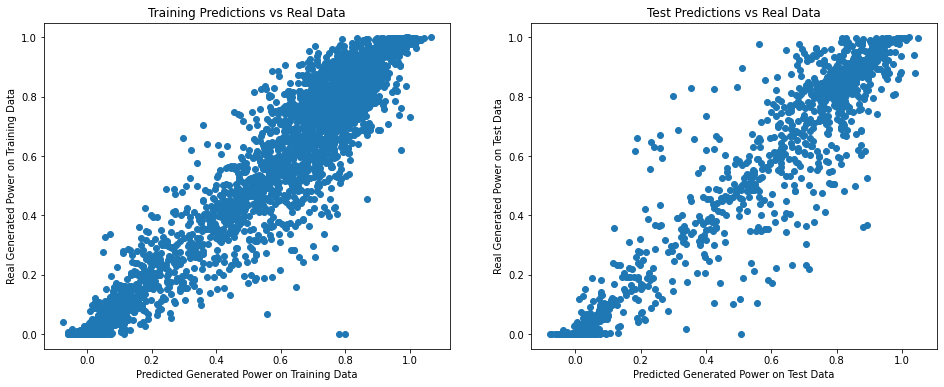

In [149]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

In [186]:
results = np.concatenate((y_test_orig, y_pred_orig), 1)
results = pd.DataFrame(data=results)
results.columns = ['y_real', 'y_predicted']
pd.options.display.float_format = "{:,.2f}".format
results[7:18]

,y_real,y_predicted
7,0.55,0.55
8,0.00,0.01
9,0.28,0.20
10,0.00,-0.02
11,0.00,0.02
12,0.90,0.89
13,0.00,0.01
14,0.00,0.01
15,0.50,0.51
16,0.00,0.02


In [191]:
pred_whole = mlp.predict(sc.fit_transform(X))
pred_whole_orig = minmax_sc.inverse_transform(pred_whole)
pred_whole_orig

array([[0.24169672],
       [0.3180694 ],
       [0.31587616],
       ...,
       [0.5025328 ],
       [0.48553213],
       [0.4716542 ]], dtype=float32)

In [192]:
r2_score(pred_whole_orig, y)

0.9601310330598071

In [182]:
data = base
corr = data.corr()
#plt.figure(figsize=(22,22))
#sns.heatmap(corr, annot=True, square=True);

In [ ]:
# from sklearn.linear_model import Lasso
# lasso = Lasso(alpha = 0.001)

# lasso.fit(X_train, y_train)

# y_pred_lasso = lasso.predict(X_test)

# lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=X.columns)
# lasso_coeff.sort_values('Feature Importance', ascending=False)

In [206]:
results_mlp = mlp.predict(x_autoarima) # get model predictions (scaled inputs here)

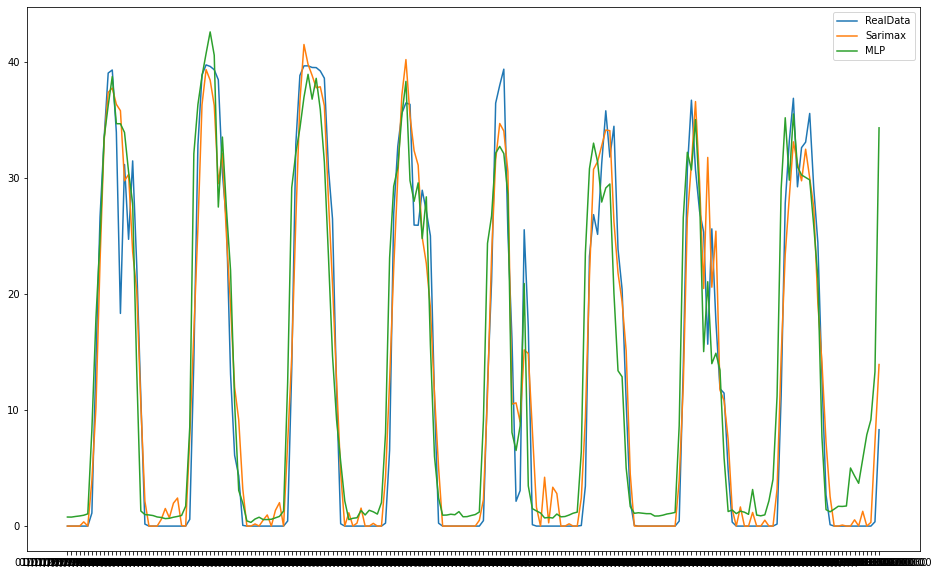

In [185]:
dump_resultado_previsoes = pickle.load(open('dump_resultado_previsoes.pckl', 'rb'))
plt.figure(figsize=(16,10))

unscaled_y_base_autoarima =   minmax_sc.inverse_transform(dump_resultado_previsoes['y_base_autoarima']) # unscale the predictions
unscaled_y_sarimax_previsoes =   minmax_sc.inverse_transform(dump_resultado_previsoes['y_sarimax_previsoes']) # unscale the predictions
unscaled_results_mlp =   minmax_sc.inverse_transform(results_mlp) # unscale the predictions

#plt.plot(dump_resultado_previsoes['datas'], dump_resultado_previsoes['y_base_autoarima'], label="RealData")
#plt.plot(dump_resultado_previsoes['datas'], dump_resultado_previsoes['y_sarimax_previsoes'],label="Sarimax")
#plt.plot(dump_resultado_previsoes['datas'].iloc[:numberData], results_mlp,label="MLP")

obj_resultado_previsoes_mlp = {'y_base_autoarima':unscaled_y_base_autoarima, 'y_sarimax_previsoes':unscaled_y_sarimax_previsoes, 'results_mlp':unscaled_results_mlp , 'datas':datas}
pickle.dump(obj_resultado_previsoes_mlp, open('dump_resultado_previsoes_mlp.pckl', 'wb'))

plt.plot(dump_resultado_previsoes['datas'], unscaled_y_base_autoarima, label="RealData")
plt.plot(dump_resultado_previsoes['datas'], unscaled_y_sarimax_previsoes,label="Sarimax")
plt.plot(dump_resultado_previsoes['datas'].iloc[:numberData], unscaled_results_mlp,label="MLP")

plt.legend()

# Teste LMST

In [212]:
from keras.layers import LSTM
from keras.layers import Activation

def create_lstm(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))
  
  model.add(Dense(1))
  model.add(Activation('linear'))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [213]:
lstm = create_lstm([32, 64], 'relu', 'normal')
lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                1152      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [214]:
hist = lstm.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test),epochs=150, verbose=0)

In [210]:
lstm.evaluate(X_train, y_train)

205/205 [==============================] - 0s 932us/step - loss: 0.0038 - root_mean_squared_error: 0.0616


[0.0037971341516822577, 0.061620891094207764]

In [219]:
# model evaluation
from sklearn import metrics
from math import sqrt
print("Model Evaluation scores:")
# calculate RMSE
testrmse = sqrt(mean_squared_error(y_pred_orig, y_test_orig))
print('Test RMSE: %.3f' % testrmse)
# calculate Rsqured
r2=r2_score(y_pred_orig, y_test_orig)
print('Test R2: %.3f' % r2)
# calculate mse
mse = mean_squared_error(y_pred_orig, y_test_orig)
print('Test MSE: %.3f' % mse)
# mean absolute error
mae = metrics.mean_absolute_error(y_pred_orig, y_test_orig)
print('Test MAE: %.3f' % mae)
# Mean Forecast Error (or Residual Forecast Error)
forecast_errors = [y_pred_orig[i]-y_test_orig[i] for i in range(len(y_pred_orig))]
bias = sum(forecast_errors) * 1.0/len(y_pred_orig)
print('Mean forcast error; MBE: %.3f' % bias)
absdev=(1/sum(y_pred_orig))* sum(numpy.abs(y_test_orig - y_pred_orig))
print('AbsDev: %.3f' % absdev)

Model Evaluation scores:
Test RMSE: 3.363
Test R2: 0.946
Test MSE: 11.311
Test MAE: 1.648
Mean forcast error; MBE: -0.031
AbsDev: 0.141


## RandomForest